# STOCK MARKET PREDICTION

### Importing the required modules

In [598]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
import pandas_ta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

pd.core.common.is_list_like = pd.api.types.is_list_like

### Using the pandas_datareader we are extracting the historical stock data from 2016 till date 

In [599]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2021, 10, 12)
df = web.DataReader('AMZN', 'yahoo', start, end)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,657.719971,627.510010,656.289978,636.989990,9314500,636.989990
2016-01-05,646.909973,627.650024,646.859985,633.789978,5822600,633.789978
2016-01-06,639.789978,620.309998,622.000000,632.650024,5329200,632.650024
2016-01-07,630.000000,605.210022,621.799988,607.940002,7074900,607.940002
2016-01-08,624.140015,606.000000,619.659973,607.049988,5512900,607.049988
2016-01-11,619.849976,598.570007,612.479980,617.739990,4891600,617.739990
2016-01-12,625.989990,612.239990,625.250000,617.890015,4724100,617.890015
2016-01-13,620.880005,579.159973,620.880005,581.809998,7655200,581.809998
2016-01-14,602.250000,569.880005,580.250000,593.000000,7238000,593.000000


In [600]:
# df.reset_index(inplace=True)

In [601]:
# df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

#### We will be using the Adjusted Closing value to create Exponential moving average using the pandas_ta library. Using the below command we are selecting only the required columns

In [602]:
df = df[['Adj Close']]

#### *Plotting the Amazon Stock Price*

<AxesSubplot:title={'center':'Stock Price'}, xlabel='Date'>

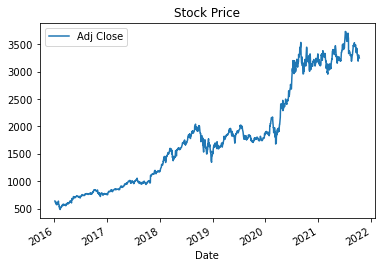

In [603]:
df.plot(title='Stock Price')

Exponential Moving Average - The exponential moving average (EMA) is a weighted average of recent period's prices. It uses an exponentially decreasing weight from each previous price/period. In other words, the formula gives recent prices more weight than past prices.

**Exponential Moving Average** = $\frac{2}{(n+1)}*(Close - Previous EMA )+PreviousEMA$

To add our technical indicators like EMA we’ll be using the pandas_ta library. A new column **"EMA_10"** will be added to our data which represents the exponential moving average over a 10-day period


In [604]:
df.ta.ema(close='Adj Close', length=10, append=True)

Date
2016-01-04            NaN
2016-01-05            NaN
2016-01-06            NaN
2016-01-07            NaN
2016-01-08            NaN
                 ...     
2021-10-06    3294.484929
2021-10-07    3295.929475
2021-10-08    3294.600501
2021-10-11    3285.818601
2021-10-12    3278.820687
Name: EMA_10, Length: 1455, dtype: float64

**The first 9 entries in our data will have Nan value since there will be no proceeding values from which the EMA can be calculated. We have to remove these specific rows which have Nan**

In [605]:
df = df.iloc[10:]

In [606]:
df.dtypes

Adj Close    float64
EMA_10       float64
dtype: object

We are plotting the EMA calculated with the Adj Close and can observe that the 10 day Exponential Moving Average is able to fit in for most of the values

<AxesSubplot:xlabel='Date'>

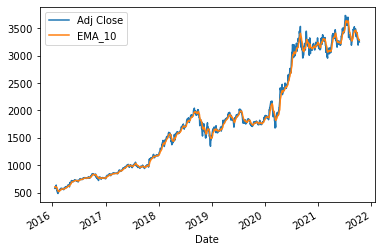

In [607]:
df.plot()

We are using the train_test_split() to split the data. The function adapts the default behaviour to pick data randomly from the dataset but for our purpose of predicting stock prices in advance will require us not to shuffle the dataset, so we are setting **shuffle** to **'False'**

This will allow the model to train on the data from 2016~ Apr 2020 and the testing to happen on the May 2020 - Oct 2021 data . We will be using the test_size param to set the test data set size. In the current inference we are using the 20% as test data

In [608]:
X=df[['Adj Close']].values
y=df[['EMA_10']].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,shuffle=False)


Using the following cell we are creating the LinearRegression model and using the previously split dataset to train the model

In [609]:

# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train,y_train)

LinearRegression()

Using the trained model we are making the predictions

In [610]:
y_pred=model.predict(X_test)

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors. It is calculated as:<br/>
MAE = $\frac{1}{n} \sum_{i=1}^{n} |Actual - Predicted|$

In [611]:
# Printout relevant metrics
print("Intercept", model.intercept_)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Intercept [16.50174877]
Model Coefficients: [[0.98147124]]
Mean Absolute Error: 68.14402011073688
Coefficient of Determination: 0.6168630788009954


We can list the actual and the predicted and can verify them using the following command

In [612]:
act_pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [613]:
act_pred_df

,Actual,Predicted
0,3211.803828,3252.775680
1,3225.061309,3240.359925
2,3240.042882,3262.678571
3,3259.396901,3300.985422
4,3292.570210,3394.578625
...,...,...
284,3294.484929,3218.070751
285,3295.929475,3257.741742
286,3294.600501,3244.187806
287,3285.818601,3202.651877


We can also plot them in a bar graph and can observe the difference between the actual and predicted price

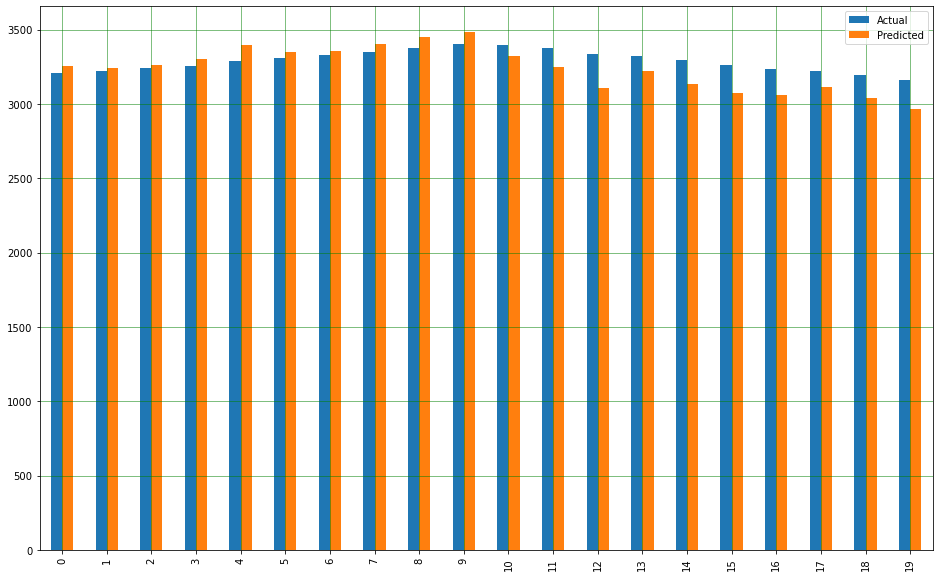

In [614]:
df2 = act_pred_df.head(20)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

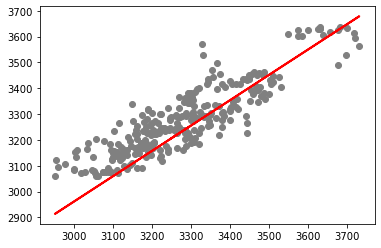

In [615]:
# Prediction vs Test Data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# TESLA STOCK PRICES

In [616]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2021, 10, 12)
tsla_df = web.DataReader('TSLA', 'yahoo', start, end)
tsla_df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001
2016-01-11,42.889999,40.599998,42.801998,41.570000,20457000.0,41.570000
2016-01-12,42.748001,41.062000,42.320000,41.993999,15459500.0,41.993999
2016-01-13,42.529999,40.000000,42.402000,40.062000,20632000.0,40.062000
2016-01-14,42.000000,38.675999,40.442001,41.236000,32453500.0,41.236000


#### We will be using the Adjusted Closing value to create Exponential moving average using the pandas_ta library. Using the below command we are selecting only the required columns

In [617]:
tsla_df = tsla_df[['Adj Close']]

#### *Plotting the Tesla Stock Price*

<AxesSubplot:title={'center':'Stock Price'}, xlabel='Date'>

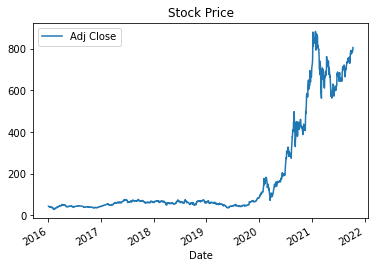

In [618]:
tsla_df.plot(title='Stock Price')

Exponential Moving Average - The exponential moving average (EMA) is a weighted average of recent period's prices. It uses an exponentially decreasing weight from each previous price/period. In other words, the formula gives recent prices more weight than past prices.

**Exponential Moving Average** = $\frac{2}{(n+1)}*(Close - Previous EMA )+PreviousEMA$

To add our technical indicators like EMA we’ll be using the pandas_ta library. A new column **"EMA_10"** will be added to our data which represents the exponential moving average over a 10-day period


In [619]:
tsla_df.ta.ema(close='Adj Close', length=10, append=True)

Date
2016-01-04           NaN
2016-01-05           NaN
2016-01-06           NaN
2016-01-07           NaN
2016-01-08           NaN
                 ...    
2021-10-06    774.677694
2021-10-07    778.119929
2021-10-08    779.459940
2021-10-11    781.729042
2021-10-12    786.091029
Name: EMA_10, Length: 1455, dtype: float64

**The first 9 entries in our data will have Nan value since there will be no proceeding values from which the EMA can be calculated. We have to remove these specific rows which have Nan**

In [620]:
tsla_df = tsla_df.iloc[10:]

In [621]:
tsla_df.dtypes

Adj Close    float64
EMA_10       float64
dtype: object

We are plotting the EMA calculated with the Adj Close and can observe that the 10 day Exponential Moving Average is able to fit in for most of the values

<AxesSubplot:xlabel='Date'>

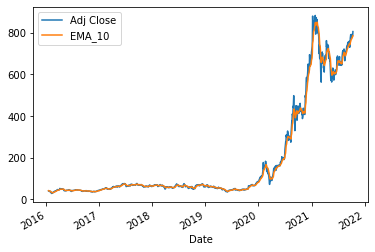

In [622]:
tsla_df.plot()

We are using the train_test_split() to split the data. The function adapts the default behaviour to pick data randomly from the dataset but for our purpose of predicting stock prices in advance will require us not to shuffle the dataset, so we are setting **shuffle** to **'False'**

This will allow the model to train on the data from 2016~ Apr 2020 and the testing to happen on the May 2020 - Oct 2021 data . We will be using the test_size param to set the test data set size. In the current inference we are using the 20% as test data

In [623]:
X=tsla_df[['Adj Close']].values
y=tsla_df[['EMA_10']].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,shuffle=False)


Using the following cell we are creating the LinearRegression model and using the previously split dataset to train the model

In [624]:

# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train,y_train)

LinearRegression()

Using the trained model we are making the predictions

In [625]:
y_pred=model.predict(X_test)

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors. It is calculated as:<br/>
MAE = $\frac{1}{n} \sum_{i=1}^{n} |Actual - Predicted|$

In [626]:
# Printout relevant metrics
print("Intercept", model.intercept_)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Intercept [3.85294763]
Model Coefficients: [[0.93133964]]
Mean Absolute Error: 37.42688155618294
Coefficient of Determination: 0.8880203021082513


We can list the actual and the predicted and can verify them using the following command

In [627]:
act_pred_tsla_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [628]:
act_pred_tsla_df

,Actual,Predicted
0,347.889003,376.729671
1,359.181184,385.698476
2,367.119150,379.033805
3,373.946214,380.736296
4,384.253084,404.919464
...,...,...
284,774.677694,732.859050
285,778.119929,742.973385
286,779.459940,735.410912
287,781.729042,741.418064


We can also plot them in a bar graph and can observe the difference between the actual and predicted price

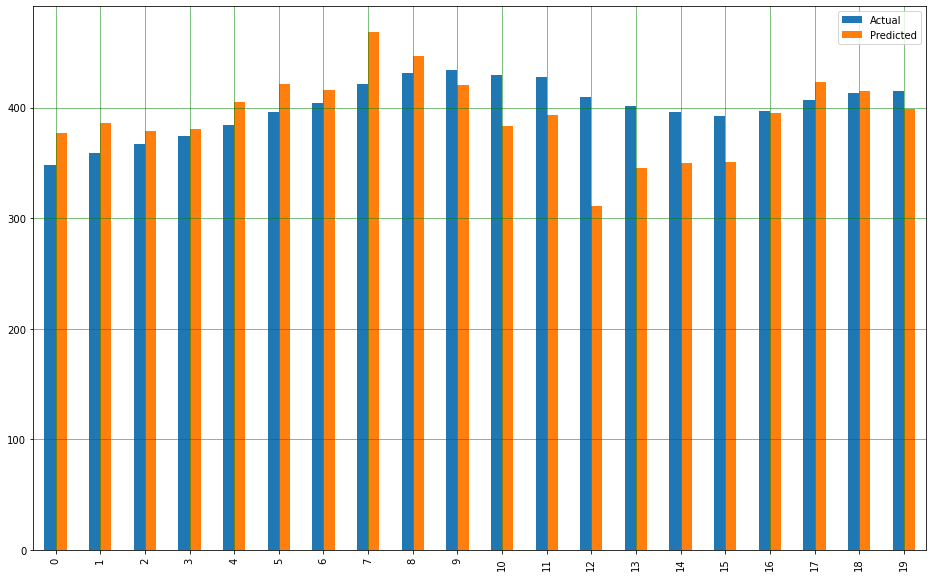

In [629]:
tsla_df2 = act_pred_tsla_df.head(20)
tsla_df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

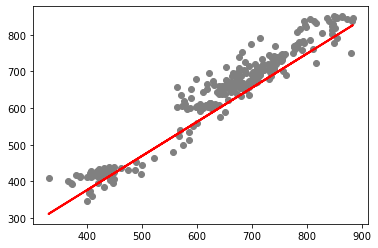

In [630]:
# Prediction vs Test Data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# GOOGLE STOCK PRICES

In [631]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2021, 10, 12)
goog_df = web.DataReader('GOOG', 'yahoo', start, end)
goog_df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015
2016-01-08,733.229980,713.000000,731.450012,714.469971,2450900,714.469971
2016-01-11,718.854980,703.539978,716.609985,716.030029,2090600,716.030029
2016-01-12,728.750000,717.317017,721.679993,726.070007,2024500,726.070007
2016-01-13,734.739990,698.609985,730.849976,700.559998,2501700,700.559998
2016-01-14,721.924988,689.099976,705.380005,714.719971,2225800,714.719971


#### We will be using the Adjusted Closing value to create Exponential moving average using the pandas_ta library. Using the below command we are selecting only the required columns

In [632]:
goog_df = goog_df[['Adj Close']]

#### *Plotting the Tesla Stock Price*

<AxesSubplot:title={'center':'Stock Price'}, xlabel='Date'>

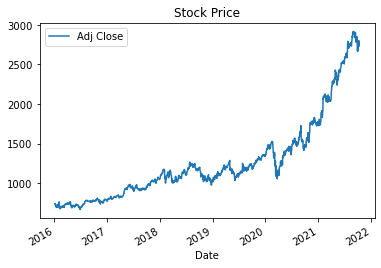

In [633]:
goog_df.plot(title='Stock Price')

Exponential Moving Average - The exponential moving average (EMA) is a weighted average of recent period's prices. It uses an exponentially decreasing weight from each previous price/period. In other words, the formula gives recent prices more weight than past prices.

**Exponential Moving Average** = $\frac{2}{(n+1)}*(Close - Previous EMA )+PreviousEMA$

To add our technical indicators like EMA we’ll be using the pandas_ta library. A new column **"EMA_10"** will be added to our data which represents the exponential moving average over a 10-day period


In [634]:
goog_df.ta.ema(close='Adj Close', length=10, append=True)

Date
2016-01-04            NaN
2016-01-05            NaN
2016-01-06            NaN
2016-01-07            NaN
2016-01-08            NaN
                 ...     
2021-10-06    2743.942539
2021-10-07    2751.172979
2021-10-08    2760.254277
2021-10-11    2763.289854
2021-10-12    2758.011701
Name: EMA_10, Length: 1455, dtype: float64

**The first 9 entries in our data will have Nan value since there will be no proceeding values from which the EMA can be calculated. We have to remove these specific rows which have Nan**

In [635]:
goog_df = goog_df.iloc[10:]

In [636]:
goog_df.dtypes

Adj Close    float64
EMA_10       float64
dtype: object

We are plotting the EMA calculated with the Adj Close and can observe that the 10 day Exponential Moving Average is able to fit in for most of the values

<AxesSubplot:xlabel='Date'>

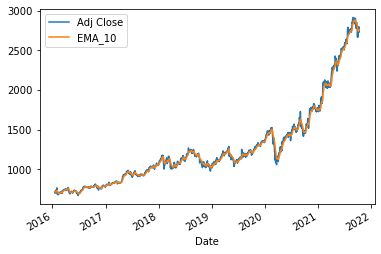

In [637]:
goog_df.plot()

We are using the train_test_split() to split the data. The function adapts the default behaviour to pick data randomly from the dataset but for our purpose of predicting stock prices in advance will require us not to shuffle the dataset, so we are setting **shuffle** to **'False'**

This will allow the model to train on the data from 2016~ Apr 2020 and the testing to happen on the May 2020 - Oct 2021 data . We will be using the test_size param to set the test data set size. In the current inference we are using the 20% as test data

In [638]:
X=goog_df[['Adj Close']].values
y=goog_df[['EMA_10']].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,shuffle=False)


Using the following cell we are creating the LinearRegression model and using the previously split dataset to train the model

In [639]:

# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train,y_train)

LinearRegression()

Using the trained model we are making the predictions

In [640]:
y_pred=model.predict(X_test)

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors. It is calculated as:<br/>
MAE = $\frac{1}{n} \sum_{i=1}^{n} |Actual - Predicted|$

In [641]:
# Printout relevant metrics
print("Intercept", model.intercept_)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Intercept [14.3205927]
Model Coefficients: [[0.98338303]]
Mean Absolute Error: 32.80716674620222
Coefficient of Determination: 0.9909873913454615


We can list the actual and the predicted and can verify them using the following command

In [642]:
act_pred_goog_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [643]:
act_pred_goog_df

,Actual,Predicted
0,1531.415711,1569.786698
1,1540.325590,1568.478842
2,1549.030019,1576.129471
3,1559.791829,1595.816818
4,1576.626042,1639.243046
...,...,...
284,2743.942539,2715.752520
285,2751.172979,2751.773725
286,2760.254277,2768.894577
287,2763.289854,2745.126046


We can also plot them in a bar graph and can observe the difference between the actual and predicted price

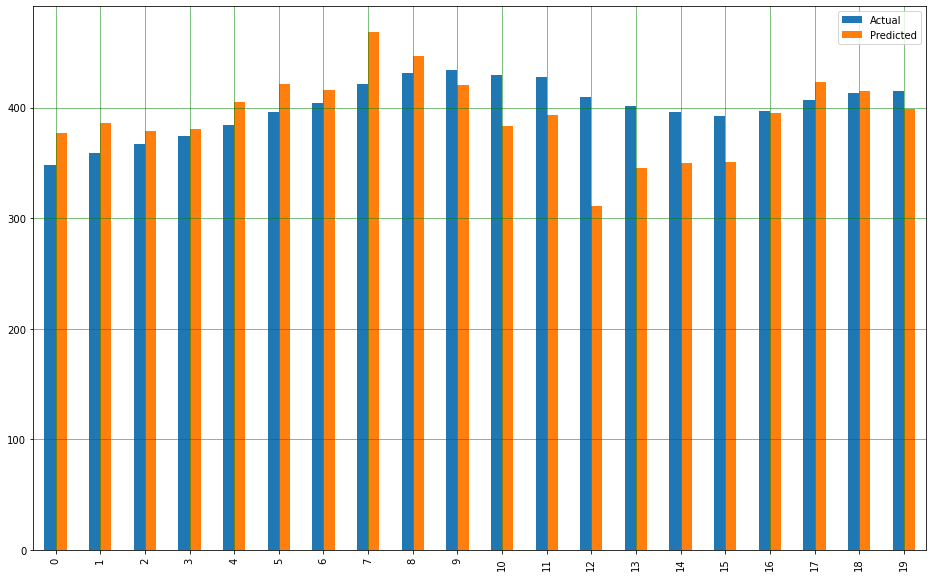

In [644]:
goog_df2 = act_pred_tsla_df.head(20)
goog_df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

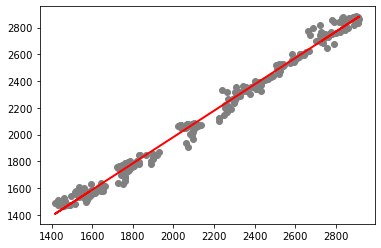

In [645]:
# Prediction vs Test Data
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()